<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/03-linear-regression/1_linear_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression Fundamentals

Linear regression algorithm consists of repeating a step in which we move a line closer to a point. We can do this using rotations and translations of **Linear Algebra Transformation** techniques.


##Setup

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_3_Linear_Regression/utils.py

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
from utils import *

##Synthetic dataset

In [3]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


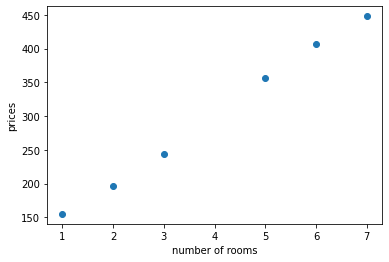

In [4]:
plot_points(features, labels)

We have to predict the price of house having rooms 4.

##The square trick

It is a much more clever way of moving our line closer
to one of the points.

The square trick will bring these four cases down to one by finding
values with the correct signs `(+ or –)` to add to the slope and the y-intercept for the line to always move closer to the point.

In [5]:
def square_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
  """
  b=base_price
  m=price_per_room
  x=num_rooms
  """
  # Calculates the prediction
  predicted_price = base_price + price_per_room * num_rooms
  # Translates the line
  base_price  += learning_rate * (actual_price - predicted_price)
  # Rotates the line
  price_per_room += learning_rate * num_rooms * (actual_price - predicted_price)
  
  return price_per_room, base_price

##The absolute trick

It is another useful trick to move the line closer to the points.

This is an intermediate between the simple and the square tricks.

In [6]:
def absolute_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
  """
  b=base_price
  m=price_per_room
  x=num_rooms
  """
  # Calculates the prediction
  predicted_price = base_price + price_per_room * num_rooms
  if actual_price > predicted_price:
    # Translates the line
    price_per_room += learning_rate * num_rooms
    base_price  += learning_rate
  else:
    # # Rotates the line
    price_per_room -= learning_rate * num_rooms
    base_price  -= learning_rate
  
  return price_per_room, base_price

##The linear regression algorithm

**We will repeat the absolute or square trick
many times to move the line closer to the points.**

